## Introduction

PCA is dimention reduction technique which takes set of possibly correlated variables and tranforms into linearly uncorrelated principal components. It is used to emphasize variations and bring out strong patterns in a dataset.

In simple words, principal component analysis is a method of extracting important variables from a large set of variables available in a data set. It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible.

![alt text](https://en.wikipedia.org/wiki/File:GaussianScatterPCA.svg)

This post is intended to visualize principle components using python. You can find mathematical explanations in links given at bottom.

Let's start!

## Importing basic packages

In [0]:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

## Loading Dataset

We can use boston housing dataset for PCA. Boston dataset has 13 features which we can reduce by using PCA.


In [184]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Standardize data 

PCA is largely affected by scales and different features might have different scales. So it is better to standardize data before finding PCA components. Sklearn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) scales data to scale of zero mean and unit variance. It is important step in many of the machine learning algorithms. 

In [0]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(boston)
x = pd.DataFrame(x, columns=boston_dataset.feature_names)


## Getting PCA Components

Calculating PCA involves following steps:

1.   Calculating the covariance matrix
2.   Calculating the eigenvalues and eigenvector
3.   Forming Principal Components
4.   Projection into the new feature space


This post is more about visualizing PCA components than to calculate and fortunately sklearn provides[ PCA module](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) for getting PCA components

In PCA(), `n_components` specifies how many components are returned after fit and tranformation.






In [186]:
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(x)
pca.shape

(506, 5)

## PCA model attribute plots

PCA components and their significance can be explained using following attributes

**Explained variance** is the amount of variance explained by each of the selected components. This attribute is associated with the sklearn PCA model as `explained_variance_`

**Explained variance ratio** is the percentage of variance explained by each of the selected components. It's attribute is `explained_variance_ratio_`



In [187]:
pcamodel.explained_variance_ 

array([6.1389812 , 1.43611329, 1.2450773 , 0.85927328, 0.83646904])

In [188]:
pcamodel.explained_variance_ratio_

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661])

### `explained_variance_` and it's cumulative sum Plot

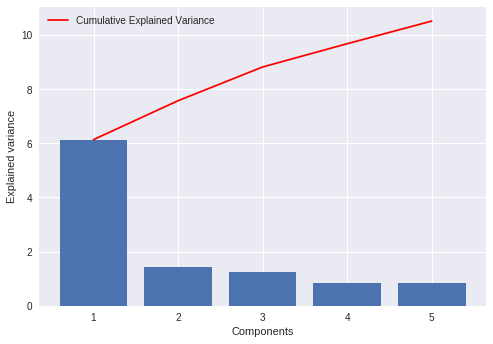

In [189]:
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

### explained_variance_ratio_ Plot

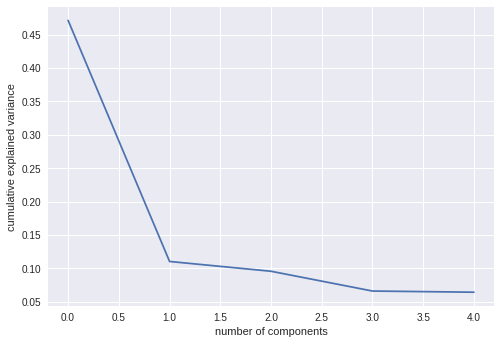

In [190]:
plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#PCA1 is at 0 in xscale

### Scree plot

Scree plot is nothing but plot of eigen values(explained_variance_) for each of the components.

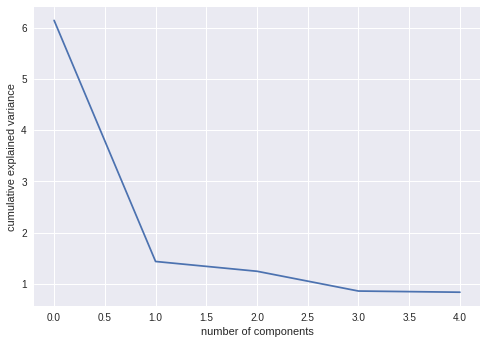

In [191]:
plt.plot(pcamodel.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

It can be seen from plots that, PCA-1 explains most of the variance than subsequent components. In other words, most of the features are explained and encompassed by PCA1

## Scatter plot of PCA1 and PCA2

`pca` helds all PCA components. First two of them can be visualized using scatter plot.


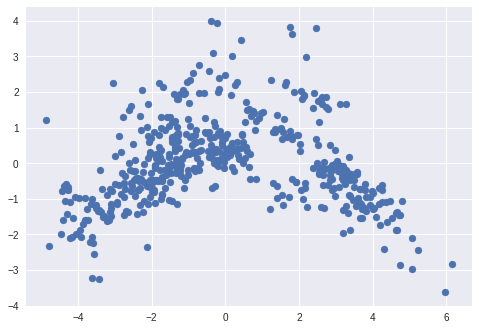

In [192]:
plt.scatter(pca[:, 0], pca[:, 1])

## 3D Scatter plot of PCA1,PCA2 and PCA3

We can use [Scatter3D](https://plot.ly/python/3d-scatter-plots/) library from plotly to plot first 3 components in 3D space.

In [193]:

#Make Plotly figure
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='prasadostwal', api_key='H9TSwQVeIPOYf5oqYIcc')

fig1 = go.Scatter3d(x=pca[:, 0],
                    y=pca[:, 1],
                    z=pca[:, 2],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="PCA1"),
                                yaxis=dict( title="PCA2"),
                                zaxis=dict(title="PCA3")),)

#Plot and save html
py.iplot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("3DPlot.html"))






## Effect of variables on each components

 `components_` attribute provides principal axes in feature space, representing the directions of maximum variance in the data. This means, we can see influence on each of the components by features.

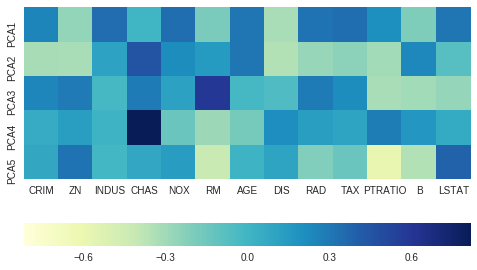

In [194]:
ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(x.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

## PCA Biplot

Biplot is an interesting plot and contains lot of useful information.

It contains two plots: 

1.   *PCA scatter plot* which shows first two component ( We already plotted this above)
2.   *PCA loading plot* which shows how strongly each characteristic influences a principal component.

**PCA Loading Plot:**  All vectors start at origin and their projected values on components explains how much weight they have on that component. Also , angles between individual vectors tells about correlation between them.

More about biplot [here](http://www.nonlinear.com/support/progenesis/comet/faq/v2.0/pca.aspx)

Let's plot for our data.

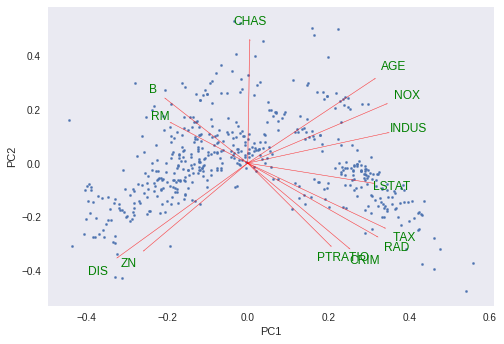

In [195]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(x.columns))
plt.show()

## Interesing reads about PCA:


* http://setosa.io/ev/principal-component-analysis/
* https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
* https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/
* https://en.wikipedia.org/wiki/Principal_component_analysis
* https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0


